### Текстовое описание набора данных
1. Title: Zoo database

2. Source Information
   -- Creator: Richard Forsyth
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990
 
3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- A simple database containing 17 Boolean-valued attributes.  The "type"
      attribute appears to be the class attribute.  Here is a breakdown of
      which animals are in which type: (I find it unusual that there are
      2 instances of "frog" and one of "girl"!)

      Class# Set of animals:
      ====== ===============================================================
           1 (41) aardvark, antelope, bear, boar, buffalo, calf,
                  cavy, cheetah, deer, dolphin, elephant,
                  fruitbat, giraffe, girl, goat, gorilla, hamster,
                  hare, leopard, lion, lynx, mink, mole, mongoose,
                  opossum, oryx, platypus, polecat, pony,
                  porpoise, puma, pussycat, raccoon, reindeer,
                  seal, sealion, squirrel, vampire, vole, wallaby,wolf
           2 (20) chicken, crow, dove, duck, flamingo, gull, hawk,
                  kiwi, lark, ostrich, parakeet, penguin, pheasant,
                  rhea, skimmer, skua, sparrow, swan, vulture, wren
           3 (5)  pitviper, seasnake, slowworm, tortoise, tuatara 
           4 (13) bass, carp, catfish, chub, dogfish, haddock,
                  herring, pike, piranha, seahorse, sole, stingray, tuna
           5 (4)  frog, frog, newt, toad 
           6 (8)  flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
           7 (10) clam, crab, crayfish, lobster, octopus,
                  scorpion, seawasp, slug, starfish, worm

5. Number of Instances: 101

6. Number of Attributes: 18 (animal name, 15 Boolean attributes, 2 numerics)

7. Attribute Information: (name of attribute and type of value domain)
   1. animal name:      Unique for each instance
   2. hair		Boolean
   3. feathers		Boolean
   4. eggs		Boolean
   5. milk		Boolean
   6. airborne		Boolean
   7. aquatic		Boolean
   8. predator		Boolean
   9. toothed		Boolean
  10. backbone		Boolean
  11. breathes		Boolean
  12. venomous		Boolean
  13. fins		Boolean
  14. legs		Numeric (set of values: {0,2,4,5,6,8})
  15. tail		Boolean
  16. domestic		Boolean
  17. catsize		Boolean
  18. type		Numeric (integer values in range [1,7])

8. Missing Attribute Values: None

9. Class Distribution: Given above

In [6]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('zoo.txt', sep=",")

In [19]:
data.head() #красота какая, всё булевое, ничего неясно
#название, шерсть, оперение, яйца, молоко, летающее, водное, хищник, имеются зубы, позвоночное, дышит легкими, 
#вырабатывает яд, ласты, количество ног, хвост, домашнее, мелкое 

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [20]:
# Размер датасета - 100 строк и 18 колонок
data.shape

(100, 18)

In [22]:
#вроде выяснили, что 100 строк, но ведь всё бывает:
total_count = data.shape[0]
print('На самом деле строк: {}'.format(total_count))

На самом деле строк: 100


In [23]:
# Список колонок
data.columns

Index(['aardvark', '1', '0', '0.1', '1.1', '0.2', '0.3', '1.2', '1.3', '1.4',
       '1.5', '0.4', '0.5', '4', '0.6', '0.7', '1.6', '1.7'],
      dtype='object')

почему такие странные колонки

а понятно

In [25]:
#нормальные колонки
data = pd.read_csv('zoo.txt', sep=",")
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type\t'],
      dtype='object')

In [31]:
# Основные статистические характеристки набора данных
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type\t
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [34]:
# Определим уникальные значения для целевого признака
# А признаком будут ноги
data['legs'].unique()

array([4, 0, 2, 6, 8, 5])

теперь мне интересно, у кого там пять ног

In [37]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

animal name - 0
hair - 0
feathers - 0
eggs - 0
milk - 0
airborne - 0
aquatic - 0
predator - 0
toothed - 0
backbone - 0
breathes - 0
venomous - 0
fins - 0
legs - 0
tail - 0
domestic - 0
catsize - 0
type	 - 0


### 3) Визуальное исследование датасета
я что-то делаю не так с этими диезами

или нет

Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

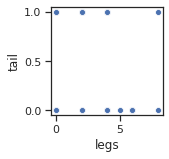

In [18]:
fig, ax = plt.subplots(figsize=(2,2)) 
sns.scatterplot(ax=ax, x='legs', y='tail', data=data)

теперь мы знаем, что у существа с пятью ногами нет хвоста
и что во всех остальных случаях ноги и хвост не связаны

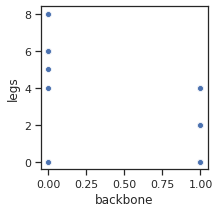

In [17]:
fig, ax = plt.subplots(figsize=(3,3)) 
sns.scatterplot(ax=ax, x='backbone', y='legs', data=data)
#у существ с двумя/четырьмя ногами есть позвоночник
#шести/восьмилаповые беспозвоночные, логично, ура

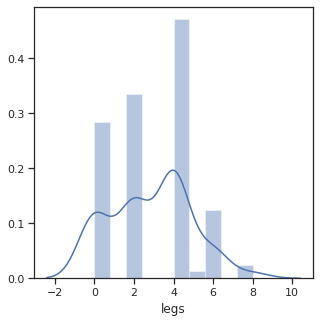

In [19]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['legs'])

вероятность того, что у кого-то минус две ноги, очень маленькая

булевы значения это скучно

поэтому мы поступили как взрослые

и добавили числовой столбик со цифрой, насколько животное мне нравится 

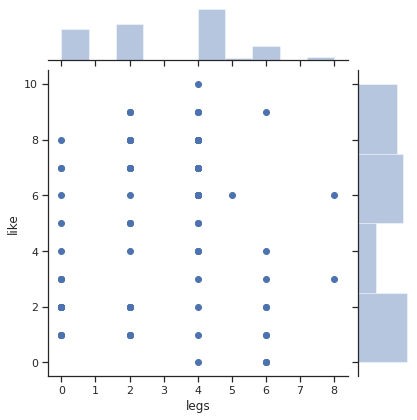

In [27]:
data = pd.read_csv('zoo.txt', sep=",")
sns.jointplot(x='legs', y='like', data=data)

In [ ]:
sns.jointplot(x='legs', y='like', data=data, kind="hex")

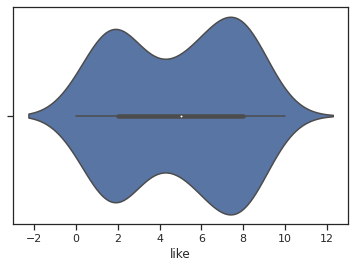

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
data = pd.read_csv('zoo.txt', sep=",")
sns.violinplot(x=data['like'])

### 4) Информация о корреляции признаков


Проверка корреляции признаков позволяет решить две задачи:

    Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "legs"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
    Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.


In [6]:
data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,like
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384,0.168548
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520,0.194100
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825,-0.245408
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683,0.273625
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677,-0.009328
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639,-0.156784
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179,-0.044140
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527,0.072430
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845,0.323927
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308,0.285397


количество ног более-менее связано с наличием шерсти и хвоста

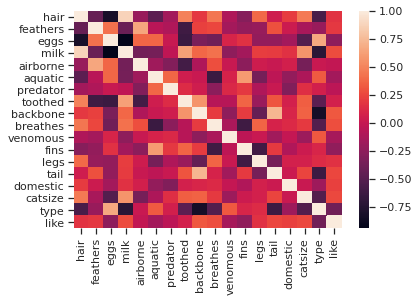

In [8]:
sns.heatmap(data.corr())

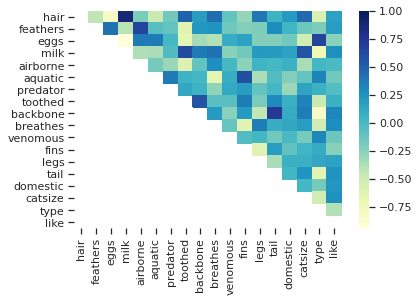

In [10]:
# Синенький треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap='YlGnBu', mask=mask)

Всё.